# Task 4.10 
# Table of contents

## 1- Importin libraries and data 
## 2- Checking data privacy
## 3- Splitting states and creating a 'region' column 
## 4- Determining spending habits
## 5- Determining and axcluding low-activity customers
## 6- Creating customer profile- age group flag, income flag, marital status, dependant flag
## 7- Creating a visualization to show the distribution of profiles
## 8- Aggregating the max, mean, and min on a customer-profile level for usega frequency
## 9- Exporting visualizations and final dataset

# 1- Importing libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import dataframe
path = r'/Users/seyda/Documents/Instacard Basket Analysis'

In [3]:
os.getcwd().find('/03')

48

In [4]:
'/Users/seyda/Documents/Instacard Basket Analysis/03 Scripts'.find('/03')

48

In [5]:
a = '/Users/seyda/Documents/Instacard Basket Analysis/03 Scripts'.find('/03')

In [6]:
b = '/Users/seyda/Documents/Instacard Basket Analysis/03 Scripts'

In [7]:
b[0:48]

'/Users/seyda/Documents/Instacard Basket Analysis'

In [8]:
os.getcwd()

'/Users/seyda/Documents/Instacard Basket Analysis/03 Scripts'

In [9]:
os.getcwd()[0:os.getcwd().find('/03')]

'/Users/seyda/Documents/Instacard Basket Analysis'

In [10]:
# new path
path = os.getcwd()[0:os.getcwd().find('/03')]

In [11]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_merged.pkl'))

# 2- Data Privacy

In [12]:
# checking columns for PII
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'median_order_frequency',
       'customer_behavior', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

In [13]:
# excluding 'first_name' and 'last_name' columns due to privacy
df.drop(['first_name', 'last_name'], inplace = True, axis = 1)

# 3- Splitting states and creating a 'region' column

In [14]:
# States in 'Northeast' region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [15]:
# States in 'Midwest' region
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']

In [16]:
# States in 'South' region
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [17]:
# States in 'West' region
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [18]:
# Creating a 'region' column
result=[]
for state in df['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [19]:
# including 'region' column to df
df['region']=result

In [20]:
df['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 4- Determining spending habits between the different U.S. regions

In [21]:
# Creating a crosstab for region by spending_flag columns
cross_habits_region = pd.crosstab(df['region'], df['spender_flag'], dropna = False).sort_index()

In [71]:
cross_habits_region/1000000

spender_flag,High spender,Low spender
region,,
Midwest,0.155975,7.441350
Northeast,0.108225,5.614511
South,0.209691,10.582194
West,0.160354,8.132559


<AxesSubplot:xlabel='region'>

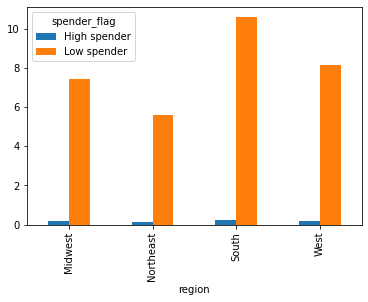

In [72]:
(cross_habits_region/1000000).plot(kind = 'bar')

Text(0, 0.5, 'orders in millions')

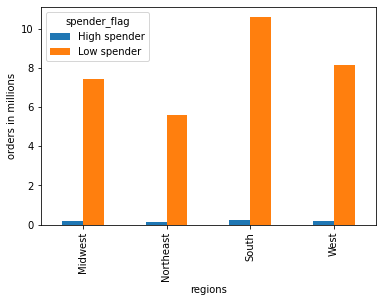

In [74]:
ax = (cross_habits_region/1000000).plot(kind = 'bar')
ax.set_xlabel("regions")
ax.set_ylabel("orders in millions")

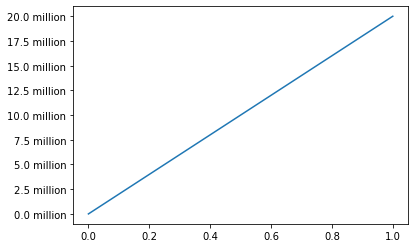

In [68]:
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.plot([0, 1], [0, 2e7])

<AxesSubplot:xlabel='region'>

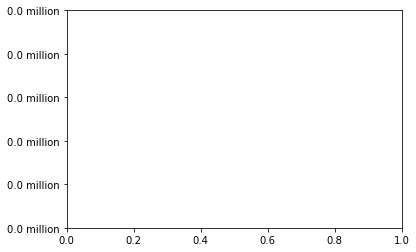

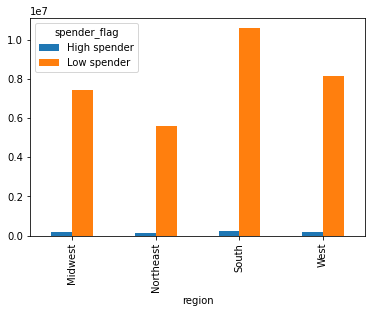

In [70]:
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())

cross_habits_region.plot(kind = 'bar')


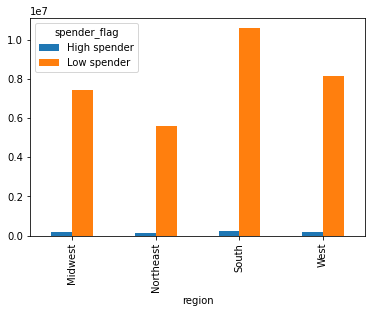

In [69]:
# Creating a bar chart for spenders by each region.
spenders_region_bar = cross_habits_region.plot(kind = 'bar')


It looks like people who spend less (based on the mean of the the prices of products purchased by user is lower than 10) in Instacart more active than people who spend more in products that pricey. 

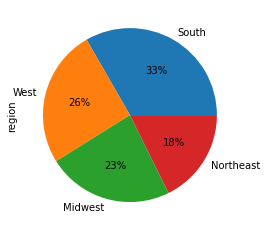

In [24]:
# Creating a pie chart to see customer distribution by each region
customer_region_pie = df['region'].value_counts().plot.pie(autopct = '%1.0f%%')

South region has the largest number of customers of Intacart. After South, West, Midwest and Northeast have the most customers, respectively.

# 5- Determining and excluding low-activity customers from the data

In [25]:
# Creating a 'activity_flag' column to determine low and high activity customers
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low_activity customer'

In [26]:
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'regular_activity customer'

In [27]:
# Check the customerrs' activities
df['activity_flag'].value_counts(dropna = False)

regular_activity customer    30964564
low_activity customer         1440295
Name: activity_flag, dtype: int64

In [28]:
## creating a subset for low_activity customers
low_activity_customers = df[df['activity_flag']=='low_activity customer']

In [29]:
low_activity_customers.shape

(1440295, 33)

In [30]:
low_activity_customers.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.csv'))

In [31]:
# excluding low_activity customers from dataframe
df.drop(df[df['activity_flag']=='low_activity customer']. index, inplace = True)

In [32]:
df['activity_flag'].value_counts()

regular_activity customer    30964564
Name: activity_flag, dtype: int64

# 6-Creating customer profiles

## Age group flag

In [33]:
# young adults range 18-24
df.loc[df['age'] <= 24, 'age_group'] = 'Young adult'
#adults range from 25-64
df.loc[(df['age'] > 24) & (df['age'] <=64), 'age_group'] = 'Adult' 
#seniors range from 65 and over
df.loc[df['age'] >=65, 'age_group'] = 'Senior'

In [34]:
df['age_group'].value_counts()

Adult          19353826
Senior          8195544
Young adult     3415194
Name: age_group, dtype: int64

## Income flag

In [35]:
# Based on official income ranges for the US in 2019
#Low income range less and equal to 52000
df.loc[df['income'] <= 52000, 'income_flag'] = 'Low income'
#Middle income ranges 52,000-156,000
df.loc[(df['income'] > 52000) & (df['income'] <=156000), 'income_flag'] = 'Middle income' 
# Upper income ranges from 156,000 and higher
df.loc[df['income'] > 156000, 'income_flag'] = 'Upper income'

In [36]:
df['income_flag'].value_counts()

Middle income    24490104
Low income        3632814
Upper income      2841646
Name: income_flag, dtype: int64

## Marital status

In [37]:
df['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

## Dependents flag

In [38]:
#customers with 0 dependents are 'no dependents' customers
df.loc[df['number_of_dependants']== 0, 'dependent_flag'] = 'No dependents'
#customers with more than 0 dependents are 'parents'
df.loc[df['number_of_dependants'] > 0, 'dependent_flag'] = 'Parent'


In [39]:
df['dependent_flag'].value_counts()

Parent           23224883
No dependents     7739681
Name: dependent_flag, dtype: int64

## Department flag

In [40]:
#import data from departments dataset
dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangle.csv'))

In [41]:
dep[['department_id', 'department']]

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [42]:
# create a flag for pet owners. 
#'8' is the department_id for 'pet' departments. 
# I will create a pet_flag for people who purchased from pet deparment.
result_2 = []
for value in df['department_id']:
    if value == 8:
        result_2.append('pet owner')
    else:
        result_2.append('no pets')

In [43]:
df['pet_owners'] = result_2

# 7- Visualizations for customer profiles

## Age group visualization

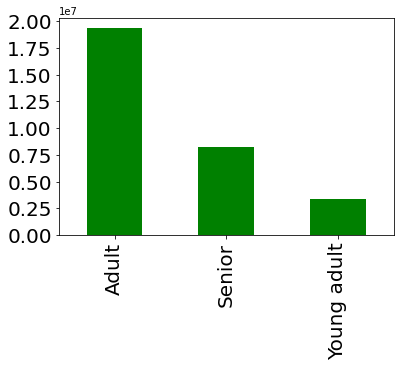

In [44]:
age_bar=df['age_group'].value_counts().plot.bar(color='green',fontsize=20)

In [45]:
# creating a age distribution chart by region
age_regional = pd.crosstab(df['region'], df['age_group'], dropna = False). sort_index()

In [46]:
age_regional

age_group,Adult,Senior,Young adult
region,,,
Midwest,4565841,1904046,791626
Northeast,3377088,1484807,602790
South,6437542,2708461,1165136
West,4973355,2098230,855642


Text(0.5, 0, 'region')

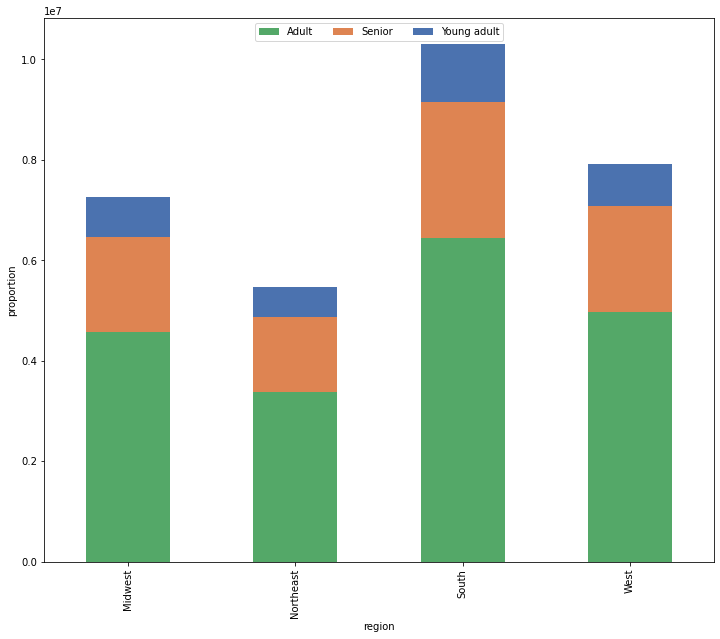

In [47]:
region_frequency_dist=age_regional.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("region")



Adults make up the largest portion of Instacart customers. Seniors are in the second place at this portion, then young adults come after seniors. 

## Income visualization

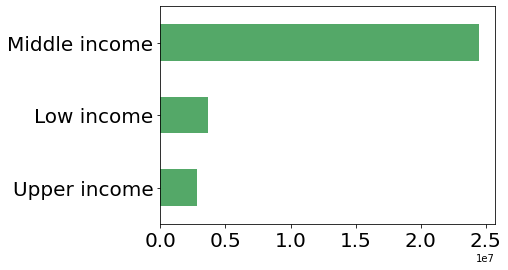

In [48]:
# income distribution
income_bar=df['income_flag'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=20)

In [49]:
# Determine in what price range the people with specific income buy the products.
# create crosstab
income_cross=pd.crosstab(df['income_flag'],df['price_range_loc'],normalize='index', dropna=False)

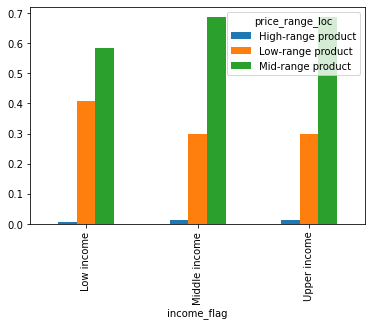

In [50]:
# create a bar chart
income_cross_bar = income_cross.plot(kind = 'bar')

People in differents incomes buy mid-range products most. 

## Marital status visualization

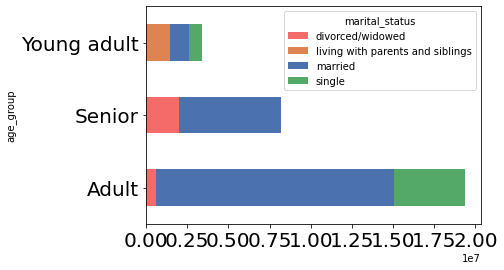

In [51]:
age_marital_bar=df.groupby('age_group')['marital_status'].value_counts().sort_values(ascending=False).unstack().plot.barh(
    stacked=True,ylabel='counts',color=['#F46B6A','#de8452','#4b72af','#54a868'], fontsize=20)

The largest part of young adults live with their parents and siblings. On the other hand, the largest part of adults and seniors are married.

## Dependent visualization

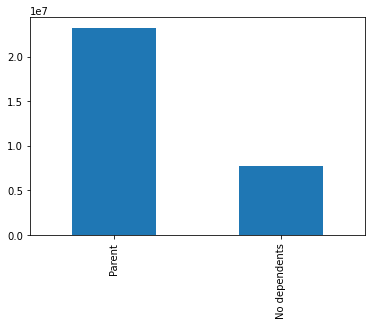

In [52]:
# determine dependent customers in Instacart
dependent_bar = df['dependent_flag'].value_counts().plot.bar()

Parents are more active in Instacart.

In [53]:
# examine customers' activity based on dependent status
dependent_customer_behavior = pd.crosstab(df['dependent_flag'], df['customer_behavior'], dropna =False)

In [54]:
dependent_customer_behavior

customer_behavior,Frequent customer,Non-frequent customer,Regular customer
dependent_flag,,,
No dependents,5544082,540110,1655489
Parent,16664812,1647307,4912764


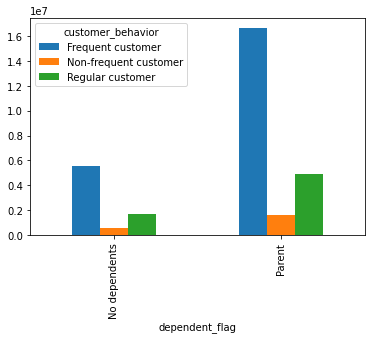

In [55]:
dependent_cust_bar = dependent_customer_behavior.plot.bar()

## Department visualization

In [56]:
# merge 'dep' dataframe and df data to determine deparments based on 'deparment_id's
df_dep_merge = df.merge(dep, on = 'department_id')

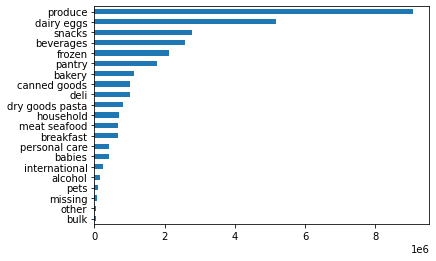

In [57]:
dep_bar = df_dep_merge['department'].value_counts().sort_values().plot.barh()


## Customer loyalty visualization

In [58]:
df_loyalty = df[['user_id', 'loyalty_flag']]

In [59]:
# df_loyalty dataframe had duplicates, we need to remove to dublicates
df_loyalty_unique = df_loyalty.drop_duplicates()

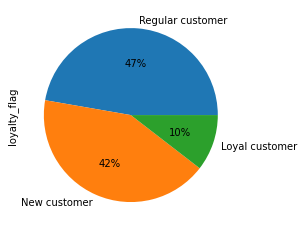

In [60]:
# create a pie chart to show distribution the customers' loyalties
loyalty_pie = df_loyalty_unique['loyalty_flag'].value_counts().plot.pie(autopct = '%1.0f%%')

In [61]:
df_loyalty_unique['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

# 8- Aggregating the max, mean, min on a customer profile for usage frequency

## Aggregating for loyalty expenditure


In [62]:
df.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.387725  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

## Aggragating for loyalty order frequency

In [63]:
df.groupby('loyalty_flag').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 5.109445  0.0  14.0
New customer                  15.954754  0.0  30.0
Regular customer              10.074591  0.0  30.0

Loyal customer orders more frequently from Instacart. On average, they place an order every 5 days. Regular customers order every 10 days, new customers order every 16 days on average.

# 9- Exporting visualaizations and final dataset

In [64]:
# export the final dataset
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))

In [65]:
# export the charts
spenders_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' spenders_region_bar.png' ))
customer_region_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','customer_region_dist_pie.png'))
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))
region_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_stackedbar.png'))
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' income_bar.png' ))
income_cross_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' income_product_price_bar.png' ))
age_marital_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_marital_bar.png' ))
dependent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' dependent_bar.png' ))
dependent_cust_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' dependent_cust_frequency_bar.png' ))
dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' department_bar.png' ))
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' loyalty_pie.png' ))